# NBA Data Analysis Summary

This notebook provides a summary of insights derived from the NBA dataset. Each insight is processed and visualized using modular functions for data wrangling and visualisation.

In [23]:
import pandas as pd 
from nba.data_wrangling import load_data, load_data_draft, load_data_team, drop_empty_str_row, convert_float, fill_na_with_mean, cleanup_position, groupby_mean, analyse_draft_picks, analyse_franchise_by_city
from nba.visualisation import bar_plot_position, radar_plot_position, plot_draft_pick_distribution, plot_franchise_stability

In [24]:
## Insight 1: Position vs Physical Condition

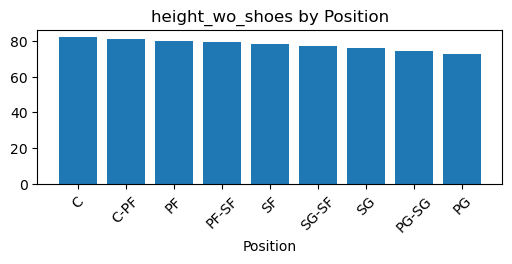

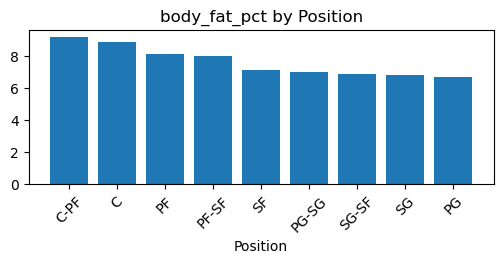

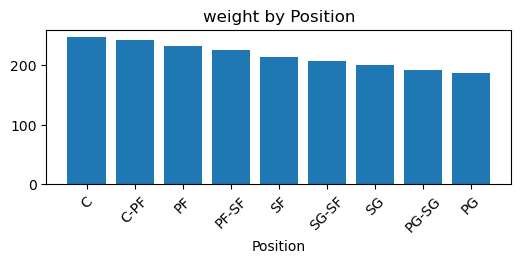

In [25]:
# Load data and select relevant features
df = load_data('draft_combine_stats')
df = df[['position', 'height_wo_shoes', 'body_fat_pct', 'weight']]

# Clean data
df = drop_empty_str_row(df, 'position')
df = convert_float(df, ['weight', 'body_fat_pct'])
df = fill_na_with_mean(df, ['height_wo_shoes', 'body_fat_pct', 'weight'])
df = cleanup_position(df)

# Aggregate
df_agg = groupby_mean(df, 'position')
bar_plot_position(df_agg, ['height_wo_shoes', 'body_fat_pct', 'weight'])

## Insight 2: Position vs Athletic Performance

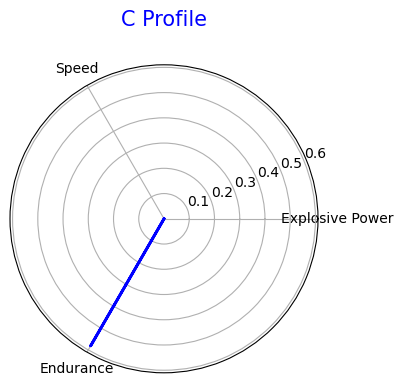

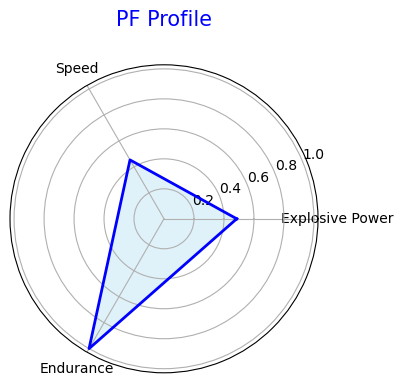

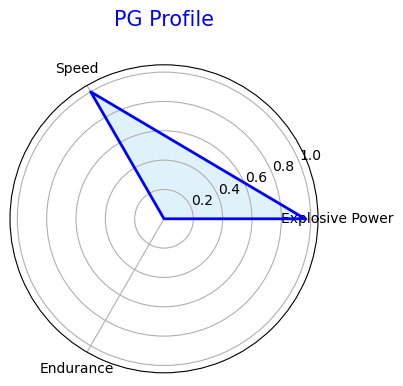

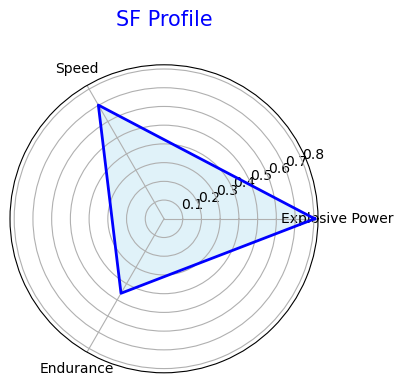

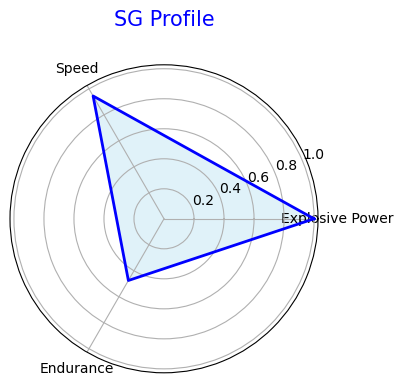

In [26]:
# Add athletic features to data and clean
df = load_data('draft_combine_stats')
df = df[['position', 'max_vertical_leap', 'lane_agility_time', 'bench_press']]
df = drop_empty_str_row(df, 'position')
df = convert_float(df, ['max_vertical_leap', 'lane_agility_time', 'bench_press'])
df = fill_na_with_mean(df, ['max_vertical_leap', 'lane_agility_time', 'bench_press'])
df = cleanup_position(df)

# Aggregate and visualize
df_agg = groupby_mean(df, 'position')
radar_plot_position(df_agg)

## Insight 3: Position vs Athletic Performance


In [27]:
# Load data
df_draft = load_data_draft('draft_history')

In [28]:
# Get draft pick distribution data
draft_pick_distribution = analyse_draft_picks(df_draft)

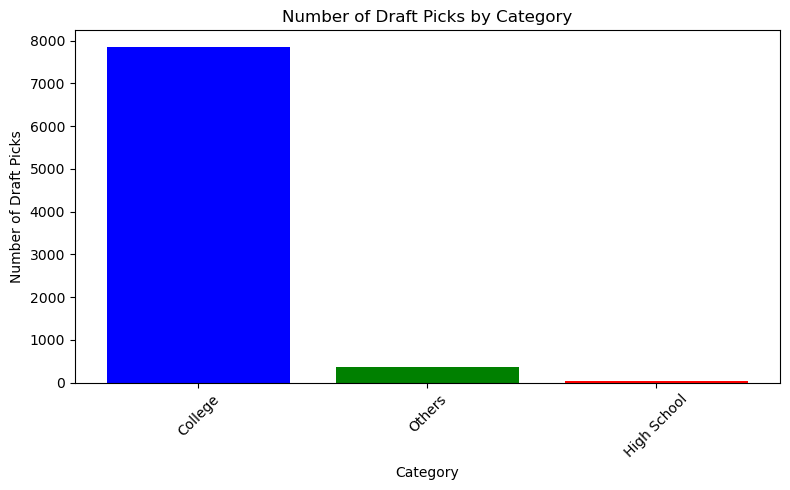

In [29]:
# Visualise the distribution
plot_draft_pick_distribution(draft_pick_distribution)

## Insight 4: Realtive Stability of NBA Franchises

In [30]:
# Load data
nba_data = load_data_team('team_history')

In [31]:
# Get franchise stability data
franchise_stability = analyse_franchise_by_city(nba_data)

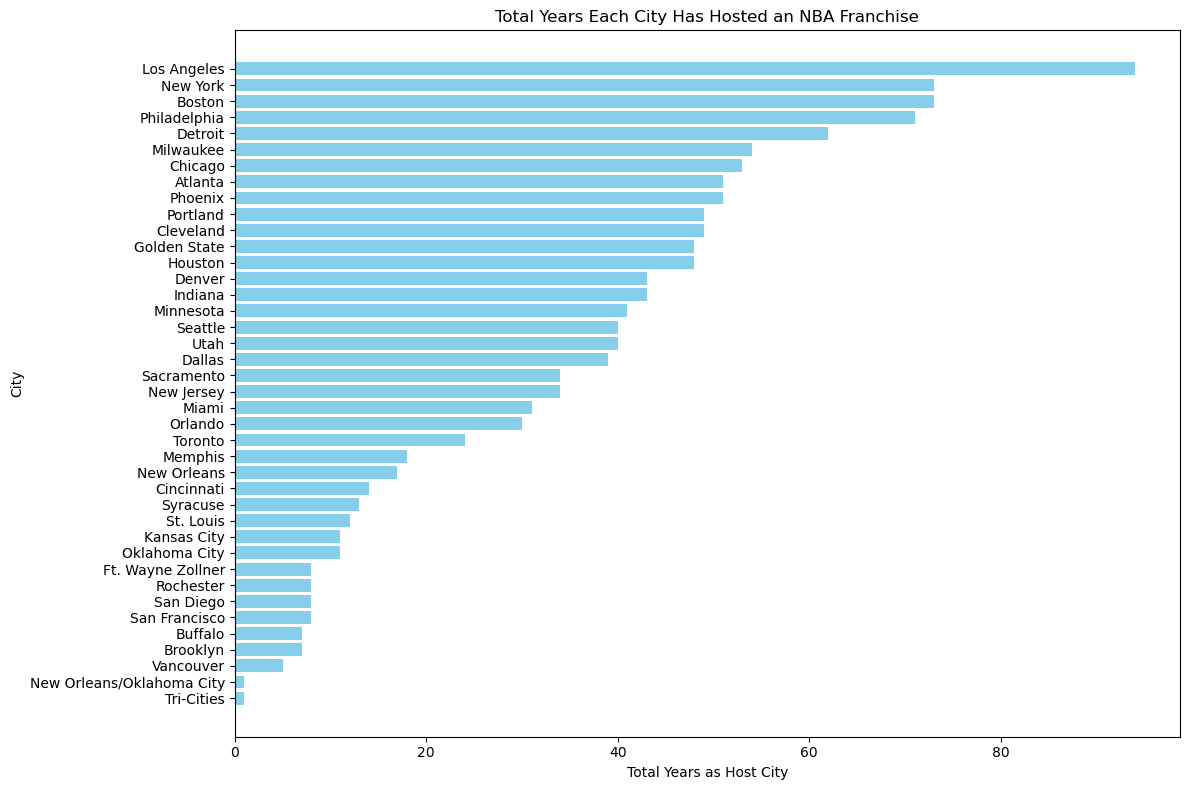

In [32]:
# Visualise franchise stability by city
plot_franchise_stability(franchise_stability)

## Conclusions

## Insight 1:

### Result: (on average)
1. for height: PG < SG < SF < PF < C
2. for weight: PG < SG < SF < PF < C
3. for body fat percentage: PG < SG < SF < PF < C

### Interpretation:

PG stands for point guards, whose primary role is to carry the ball across the perimeter, hence players in this position are on average shorter and lighter

On the contrary, C (centers) are mainly responsible for blocking and defending, hence players in center position on average would be taller and heavier 


## Insight 2:

### Result: (on average)
1. C and PF: perform the best in bench press
2. PG and SG: perform the best in lane agibility 
3. SG and PG: perform the best in vertical leap

### Interpretation:

Shooting Guards and Point Guards are responsible for shooting and dunking, hence they normally have the best jumping skills and explosive power 

Point Guards and  Shooting Guards require high agility to move pass the perimeter, hence they have the best speed and are the quickest players on the court  


Center and Power Forwards require players are the most physically demanding positions, hence we can see players in these two positsion in general have greater endurance 

## Insight 3:

### Result:
1. College recruits make up the majority of NBA draft picks.
2. High School recruits have a relatively small representation compared to college recruits.
3. Other sources provide some NBA talent but are less common than college pathways.

### Interpretation:

The preference for players with collegiate experience reflects the NBA’s reliance on college programs as a primary development ground for talent. This preference suggests that collegiate leagues provide a structured training environment that helps players build essential skills for the NBA.


## Insight 4:

### Result:

1. Los Angeles, New York, and Boston are among the cities with the longest NBA presence, indicating high franchise stability.
2. Cities with shorter hosting durations may represent newer franchises or locations with more team movement.

### Interpretation:

Cities with long-standing NBA franchises, such as Los Angeles and New York, reflect established markets that benefit from consistent fan engagement and revenue. The stability in these cities points to strong local support and significant market value, while newer or shorter-duration cities may still be developing their fan base and market presence.